# Data Preprocessing 

## Importing the libraries

In [1]:
# Install numpy if not available
!pip install numpy

import numpy as np
# Install matplotlib if not available
!pip install matplotlib

import matplotlib.pyplot as plt
# Install pandas if not available
!pip install pandas

import pandas as pd
# Install scikit-learn if not available
!pip install scikit-learn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Install seaborn if not available
!pip install seaborn

import seaborn as sns


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing the dataset

In [2]:
dataset = pd.read_csv("column_3C_weka.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)


[[ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 39.05695098  10.06099147  25.01537822  28.99595951 114.4054254
    4.56425864]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]
 ...
 [ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]]


In [4]:
print(y)

['Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Hernia'
 'Hernia' 'Hernia' 'Hernia' 'Hernia' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spo

## Taking care of missing data

In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 0:6])  # Fit on all columns that need imputation
X[:, 0:6] = imputer.transform(X[:, 0:6])

In [6]:
print(X)

[[ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 39.05695098  10.06099147  25.01537822  28.99595951 114.4054254
    4.56425864]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]
 ...
 [ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]]


In [7]:
# Check for sparsity or near-zero values in features
# Fix: Use correct number of columns for DataFrame
df = pd.DataFrame(X, columns=dataset.columns[:-1])  # Ensure columns match X shape
for col in df.columns:
    print(f"Value counts for {col} (showing up to 10 most common values):")
    print(df[col].value_counts().head(10))
    num_zeros = (df[col] == 0).sum()
    print(f"Number of zeros: {num_zeros} ({num_zeros/len(df)*100:.1f}% of samples)")
    print('-'*40)

Value counts for pelvic_incidence (showing up to 10 most common values):
pelvic_incidence
63.027817    1
56.535051    1
54.920858    1
38.505273    1
48.259920    1
87.679087    1
74.094731    1
95.480229    1
80.111572    1
73.635962    1
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for pelvic_tilt (showing up to 10 most common values):
pelvic_tilt
22.552586    1
14.377189    1
18.968430    1
16.964297    1
16.417462    1
20.365613    1
18.823727    1
46.550053    1
33.942432    1
9.711318     1
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for lumbar_lordosis_angle (showing up to 10 most common values):
lumbar_lordosis_angle
52.0    4
42.0    4
47.0    4
35.0    4
37.0    3
34.0    3
58.0    3
44.0    2
51.0    2
40.0    2
Name: count, dtype: int64
Number of zeros: 0 (0.0% of samples)
----------------------------------------
Value counts for s

### Encoding the Dependent Variable

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Splitting the dataset into the Training set and Test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
print(X_train)

[[ 61.44659663  22.6949683   46.17034732  38.75162833 125.6707246
   -2.70787952]
 [ 63.0278175   22.55258597  39.60911701  40.47523153  98.67291675
   -0.25439999]
 [ 69.62628302  21.12275138  52.76659472  48.50353164 116.8030913
   54.81686729]
 ...
 [ 84.97413208  33.02117462  60.85987263  51.95295747 125.6595336
   74.33340864]
 [ 63.92947003  19.97109671  40.17704963  43.95837332 113.0659387
  -11.05817866]
 [ 35.70345781  19.44325311  20.7         16.26020471 137.5406125
   -0.26348965]]


In [12]:
print(X_test)

[[ 67.41253785  17.44279712  60.14464036  49.96974073 111.12397
   33.15764573]
 [ 63.02630005  27.33624023  51.60501665  35.69005983 114.5066078
    7.4398698 ]
 [ 91.46874146  24.50817744  84.62027202  66.96056402 117.3078968
   52.62304673]
 [ 72.56070163  17.38519079  51.99999999  55.17551084 119.1937238
   32.10853735]
 [ 54.74177518  12.09507205  40.99999999  42.64670314 117.6432188
   40.3823266 ]
 [ 70.39930842  13.46998624  61.19999999  56.92932218 102.3375244
   25.53842852]
 [ 33.84164075   5.07399141  36.64123294  28.76764934 123.9452436
   -0.19924909]
 [ 72.05403412  24.70073725  79.87401586  47.35329687 107.1723576
   56.42615873]
 [ 84.99895554  29.61009772  83.35219438  55.38885782 126.9129899
   71.32117542]
 [ 69.3988184   18.89840693  75.96636144  50.50041147 103.5825398
   -0.44366081]
 [ 65.61180231  23.13791922  62.58217893  42.47388309 124.1280012
   -4.08329841]
 [ 45.25279209   8.69315736  41.5831264   36.55963472 118.5458418
    0.21475017]
 [ 43.20318499  19

In [13]:
print(y_train)

[1 0 2 2 2 2 2 2 2 2 2 1 1 0 2 2 2 1 0 2 2 1 0 2 2 2 0 1 0 1 2 2 1 2 0 2 1
 1 2 1 1 1 0 0 2 1 2 0 1 2 2 2 2 1 0 2 1 2 2 2 2 2 1 0 1 1 0 0 0 0 1 0 1 2
 0 0 1 2 1 1 2 2 2 1 1 1 0 1 1 0 0 2 2 0 2 0 1 2 1 2 2 2 1 2 1 0 2 2 2 2 1
 2 1 1 2 2 1 2 2 1 1 0 2 1 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 0
 0 0 2 1 0 1 0 1 2 0 1 0 1 1 2 2 1 1 1 2 1 1 0 2 1 0 0 2 2 1 2 2 2 2 2 1 2
 0 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 0 2 2 0 2 0 2 0 0 0 1 0 2 2 1 1 1
 2 0 0 0 2 2 1 1 2 0 2 1 1 1 2 1 1 2 2 2 2 2 1 2 1 0]


In [14]:
print(y_test)

[2 1 2 2 2 2 1 2 2 1 1 1 0 0 1 2 1 1 1 2 2 1 0 2 0 2 2 2 2 2 2 1 1 0 0 2 0
 1 2 2 1 1 2 1 2 2 1 1 2 1 2 1 0 2 2 0 2 2 0 2 0 2]


## Feature Scaling

### Log Transformation for Highly Skewed Feature

The `degree_spondylolisthesis` feature (last column) has a high skewness (~4). We apply a log1p transformation to reduce skewness before scaling.

In [15]:
# Apply log1p transformation to degree_spondylolisthesis (last column, index 5)
X_train[:, 5] = np.log1p(X_train[:, 5])
X_test[:, 5] = np.log1p(X_test[:, 5])

C:\Users\patri\AppData\Local\Temp\ipykernel_19692\3862945560.py:2: RuntimeWarning: invalid value encountered in log1p
  X_train[:, 5] = np.log1p(X_train[:, 5])
C:\Users\patri\AppData\Local\Temp\ipykernel_19692\3862945560.py:3: RuntimeWarning: invalid value encountered in log1p
  X_test[:, 5] = np.log1p(X_test[:, 5])


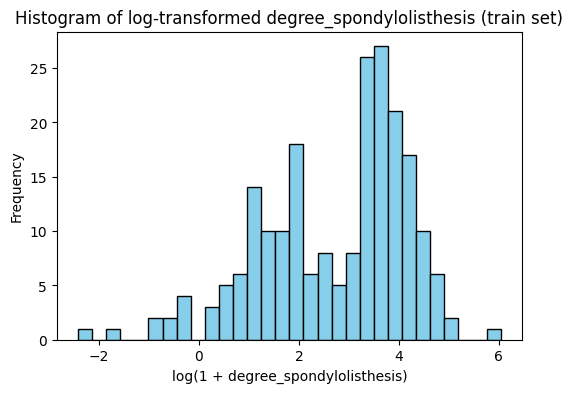

In [16]:
# Show histogram of log-transformed degree_spondylolisthesis (train set)
plt.figure(figsize=(6,4))
plt.hist(X_train[:, 5], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of log-transformed degree_spondylolisthesis (train set)')
plt.xlabel('log(1 + degree_spondylolisthesis)')
plt.ylabel('Frequency')
plt.show()

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[ 0.06676731  0.55096591 -0.31581494 -0.31561219  0.59294449         nan]
 [ 0.15935097  0.53651871 -0.6692242  -0.18879786 -1.58014878 -2.07520444]
 [ 0.5457044   0.39143676  0.03948044  0.40188538 -0.12082436  0.87332449]
 ...
 [ 1.44435183  1.59874181  0.47541077  0.65567734  0.59204371  1.07818608]
 [ 0.21214454  0.27458106 -0.63863349  0.06747476 -0.42163327         nan]
 [-1.44054525  0.22102201 -1.68773087 -1.97042165  1.54836922 -2.0835848 ]]


In [19]:
print(X_test)

[[ 4.16085166e-01  1.80404425e-02  4.36886027e-01  5.09761905e-01
  -5.77945185e-01  5.37802674e-01]
 [ 1.59262119e-01  1.02190487e+00 -2.30859405e-02 -5.40867498e-01
  -3.05671694e-01 -4.17350934e-01]
 [ 1.82462428e+00  7.34947986e-01  1.75522333e+00  1.75986397e+00
  -8.01918217e-02  8.45929347e-01]
 [ 7.17520510e-01  1.21952635e-02 -1.81085042e-03  8.92777126e-01
   7.16011673e-02  5.16489469e-01]
 [-3.25813476e-01 -5.24580657e-01 -5.94306704e-01 -2.90315504e-02
  -5.32012607e-02  6.68890171e-01]
 [ 5.90966590e-01 -3.85071345e-01  4.93731137e-01  1.02181403e+00
  -1.28517912e+00  3.65363218e-01]
 [-1.54955839e+00 -1.23699322e+00 -8.29084105e-01 -1.05018476e+00
   4.54057985e-01 -2.02644948e+00]
 [ 6.87854109e-01  7.54486577e-01  1.49957450e+00  3.17256703e-01
  -8.96016280e-01  8.92744182e-01]
 [ 1.44580530e+00  1.25262785e+00  1.68692053e+00  9.08474158e-01
   6.92936249e-01  1.05030614e+00]
 [ 5.32385887e-01  1.65737750e-01  1.28909549e+00  5.48806074e-01
  -1.18496599e+00 -2.2752

In [22]:
# Save scaler parameters after fitting StandardScaler
np.savez("scaler.npz", mean=sc.mean_, scale=sc.scale_)

# Exploratory Data Analysis (EDA)

## 1. Dimensionality Checks and Multicollinearity Analysis

Shape: (310, 6)
Number of features: 6
Unique labels: [0 1 2]


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


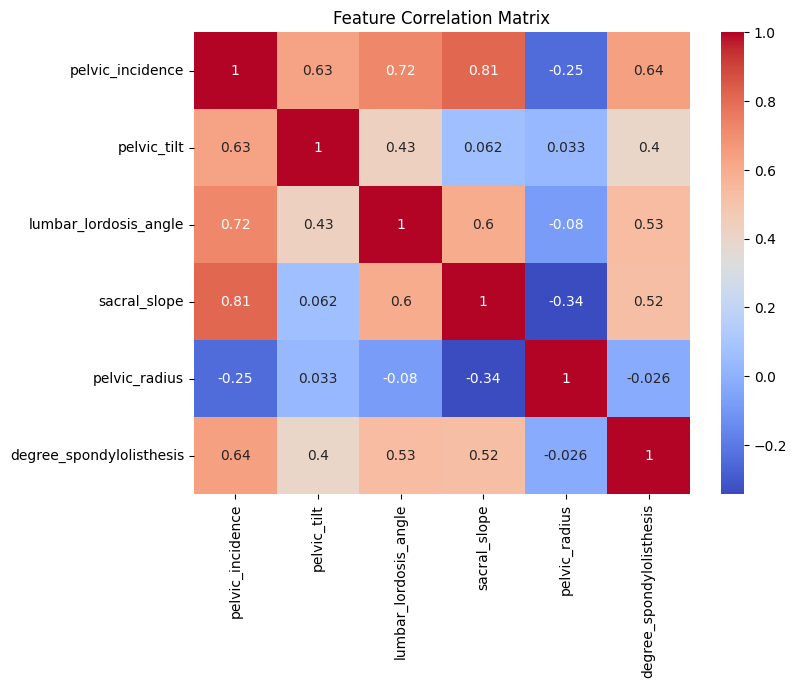

In [23]:
# Check shape and basic info
print('Shape:', X.shape)
print('Number of features:', X.shape[1])
print('Unique labels:', np.unique(y))

# Correlation matrix
corr_matrix = pd.DataFrame(X, columns=dataset.columns[:-1]).corr()
display(corr_matrix)

# Visualize correlation matrix
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## 2. Assess Distribution Skewness and Apply Transformations

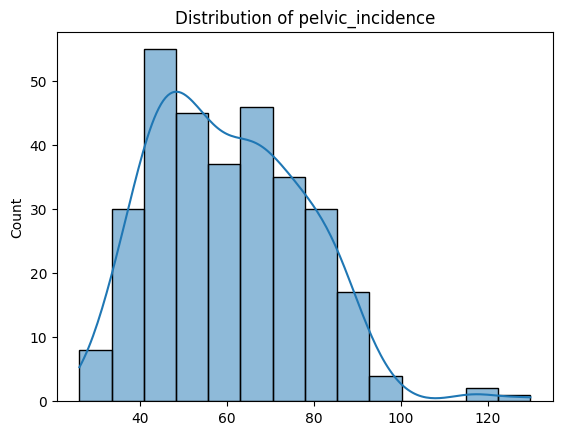

Skewness of pelvic_incidence: 0.52


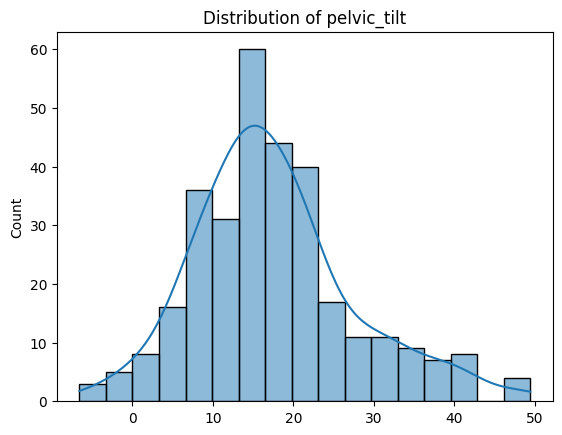

Skewness of pelvic_tilt: 0.67


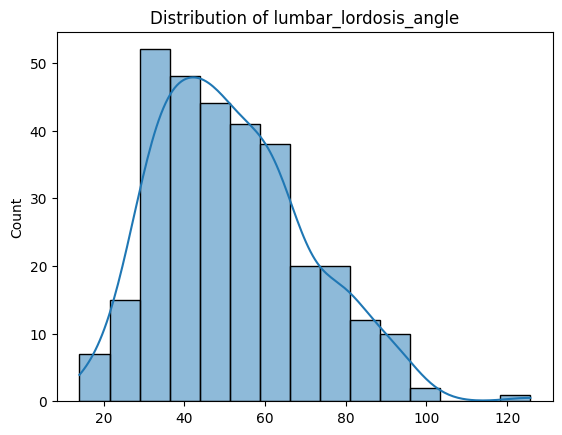

Skewness of lumbar_lordosis_angle: 0.60


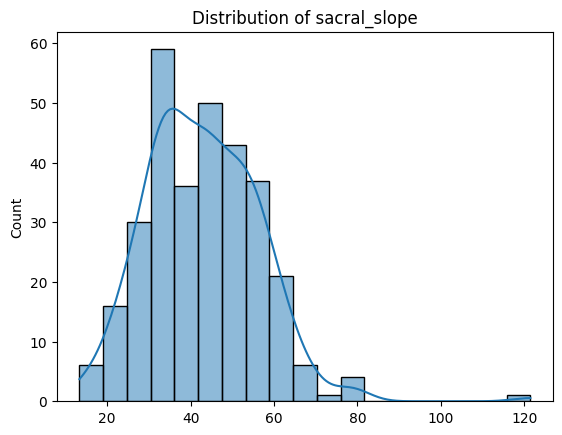

Skewness of sacral_slope: 0.79


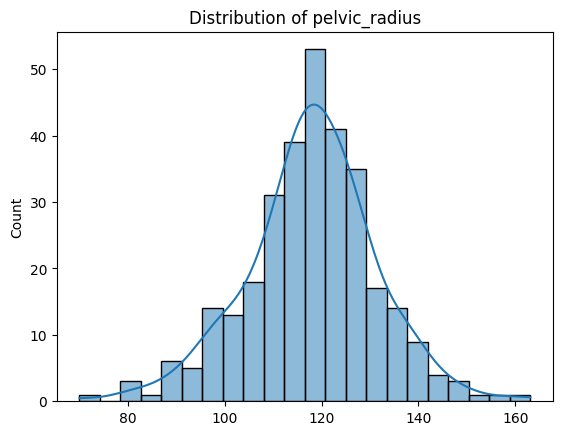

Skewness of pelvic_radius: -0.18


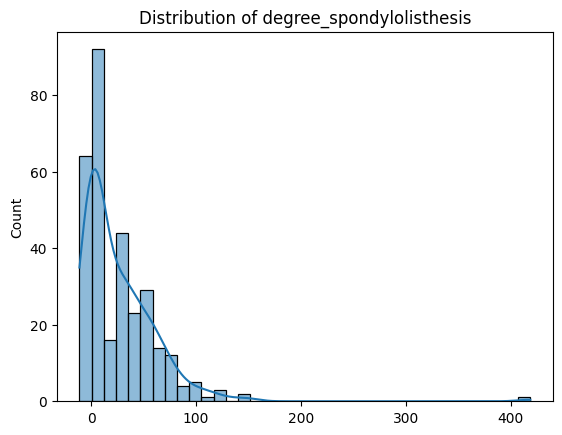

Skewness of degree_spondylolisthesis: 4.30
Skewness of pelvic_incidence (Original): 0.52
Skewness of pelvic_incidence (Transformed): 0.52


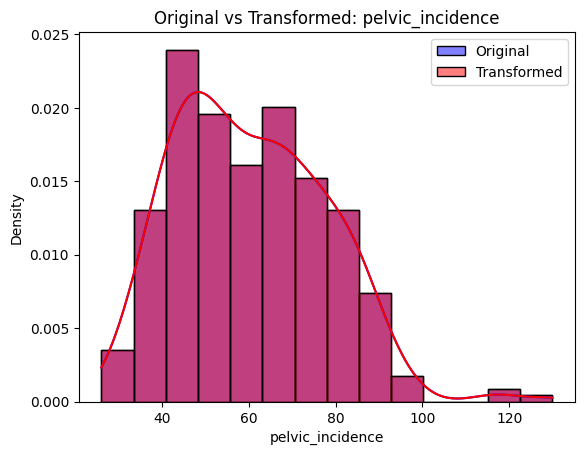

In [24]:
# Check skewness and plot distributions
import scipy.stats as stats
feature_names = dataset.columns[:-1]
for i, name in enumerate(feature_names):
    plt.figure()
    sns.histplot(X[:, i], kde=True)
    plt.title(f'Distribution of {name}')
    plt.show()
    skew = stats.skew(X[:, i])
    print(f'Skewness of {name}: {skew:.2f}')

# Example: Apply log1p transformation if skewness > 1 or < -1
X_transformed = X.copy()
for i in range(X.shape[1]):
    skew = stats.skew(X[:, i])
    if abs(skew) > 1:
        X_transformed[:, i] = np.log1p(np.abs(X[:, i])) * np.sign(X[:, i])

# Compare before/after for pelvic_incidence (first feature)
orig_skew = stats.skew(X[:, 0])
trans_skew = stats.skew(X_transformed[:, 0])
print(f"Skewness of {feature_names[0]} (Original): {orig_skew:.2f}")
print(f"Skewness of {feature_names[0]} (Transformed): {trans_skew:.2f}")
plt.figure()
sns.histplot(X[:, 0], color='blue', label='Original', kde=True, stat='density', alpha=0.5)
sns.histplot(X_transformed[:, 0], color='red', label='Transformed', kde=True, stat='density', alpha=0.5)
plt.legend()
plt.title(f'Original vs Transformed: {feature_names[0]}')
plt.xlabel(feature_names[0])
plt.show()

## 3. Explore Inter-feature Interactions and Feature Redundancy

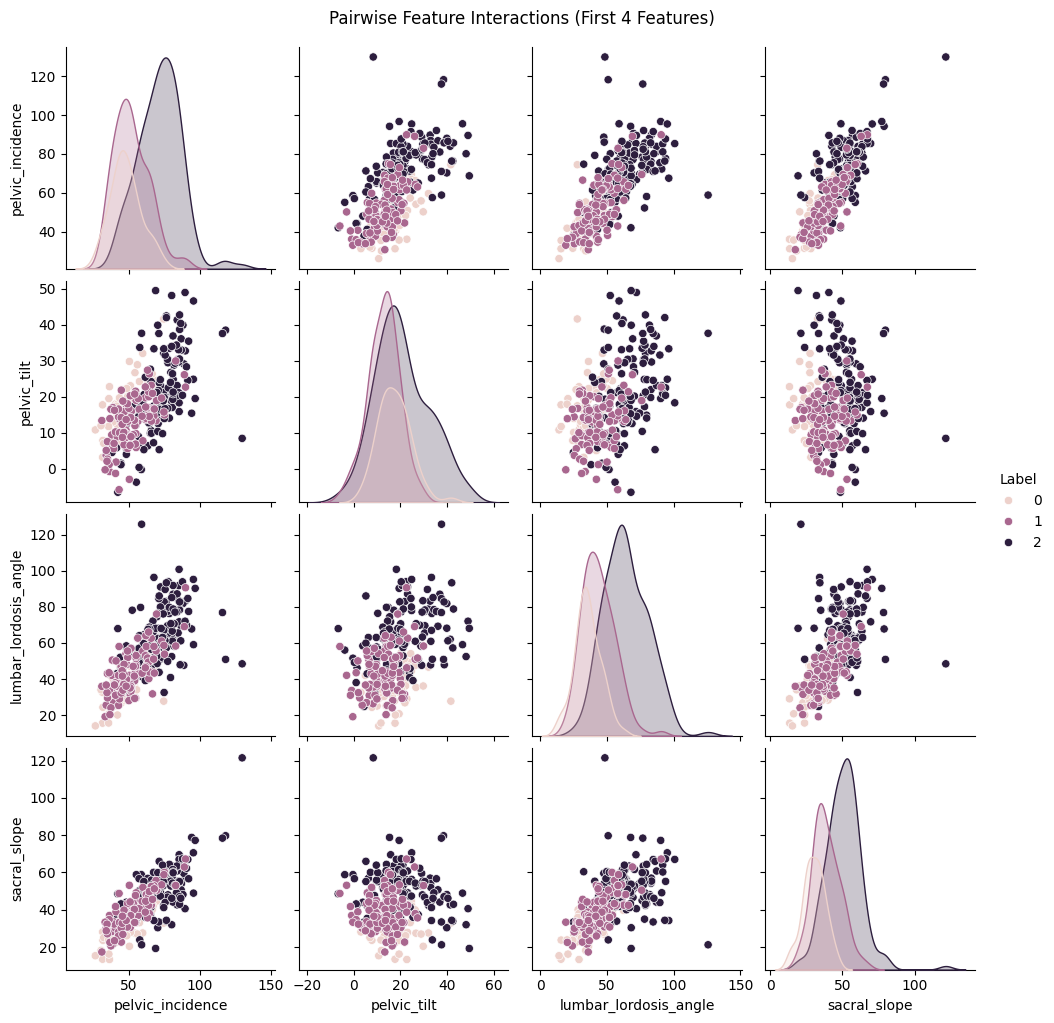

Highly correlated feature pairs (|corr| > 0.9):


In [25]:
# Pairplot for first 4 features
sns.pairplot(pd.DataFrame(X, columns=feature_names).iloc[:, :4].assign(Label=y), hue='Label')
plt.suptitle('Pairwise Feature Interactions (First 4 Features)', y=1.02)
plt.show()

# Check for redundancy (high correlation)
redundant = corr_matrix.abs() > 0.9
print('Highly correlated feature pairs (|corr| > 0.9):')
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        if redundant.iloc[i, j]:
            print(f'{feature_names[i]} & {feature_names[j]}: {corr_matrix.iloc[i, j]:.2f}')

## 4. Key Questions & Model/Feature Importance Discussion

**Can a neural network learn feature interactions better than tree-based models?**
- Neural networks can model complex, non-linear feature interactions via hidden layers and learned weights.
- Tree-based models (e.g., Random Forest, XGBoost) can also capture non-linearities and interactions, but may struggle with very high-dimensional or subtle interactions unless deep trees are used.
- Empirical comparison (e.g., via cross-validation) is needed to determine which works better for this dataset.

**Are non-linear relationships dominant across features like lumbar angle and pelvic incidence?**
- Pairplots and correlation analysis can reveal non-linear patterns.
- If scatterplots show curved or clustered relationships, non-linear models may be more appropriate.

**Which features contribute most to misclassifications or prediction errors?**
- Use feature importance from tree-based models or permutation importance.
- Analyze confusion matrix and error cases to see which features are most associated with misclassified samples.

**How do feature importances change when learned via embeddings vs. raw input?**
- Neural networks with embedding layers may learn different importances compared to raw input models.
- Compare feature importance from tree-based models (raw input) vs. neural network (e.g., via SHAP or integrated gradients).

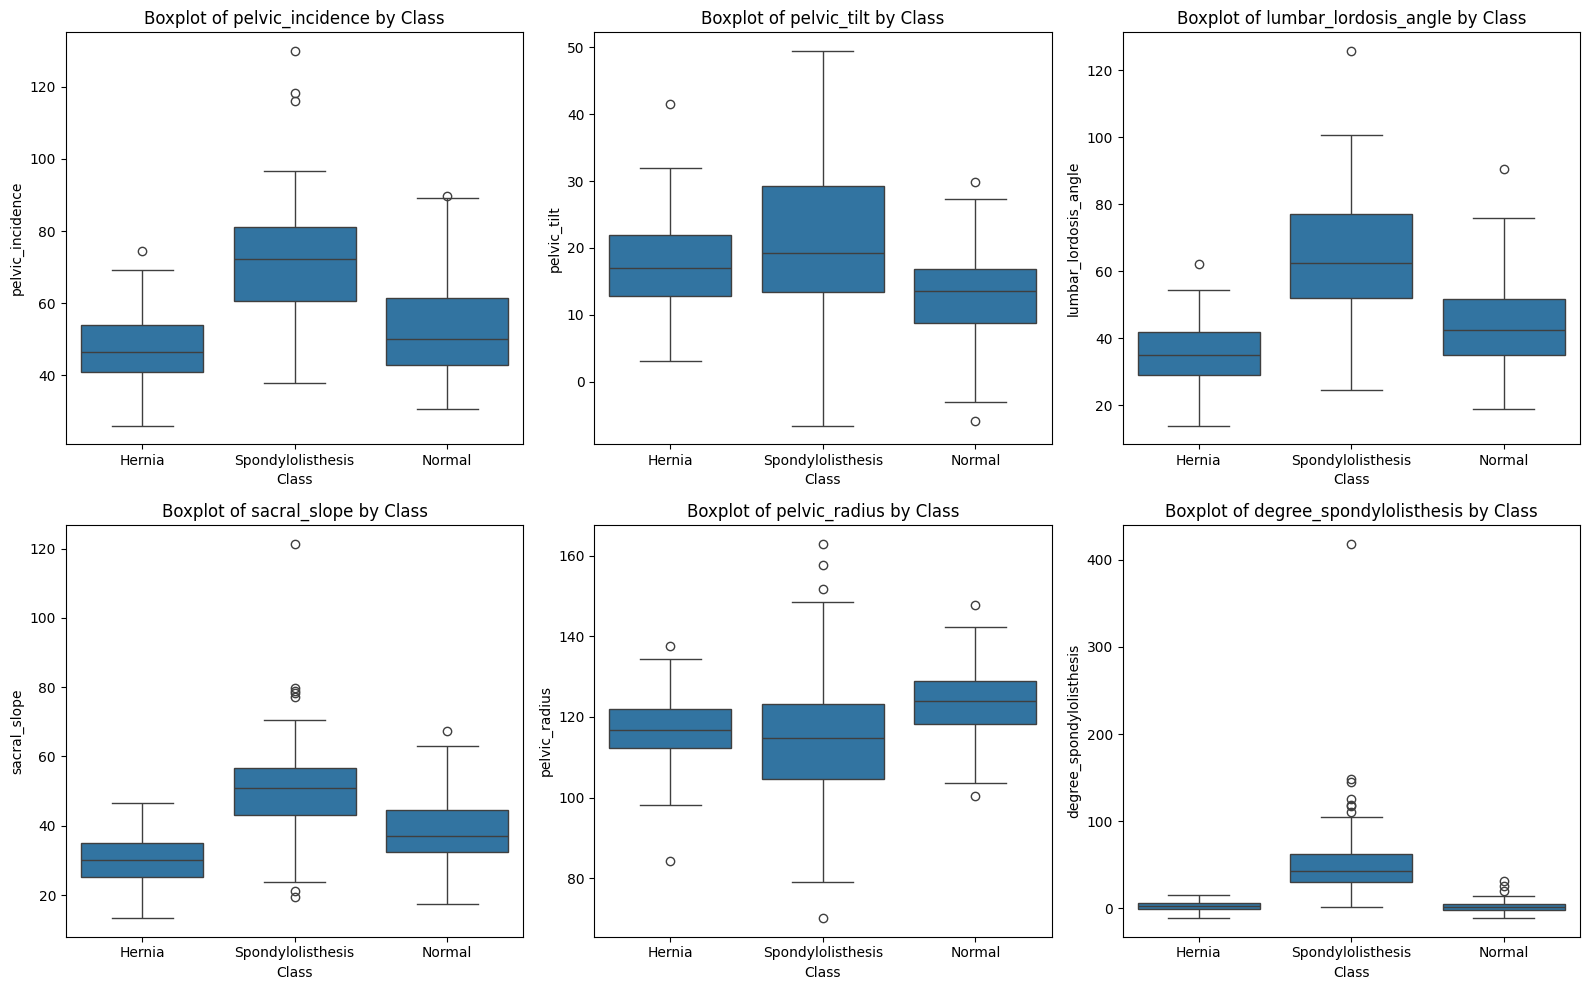

In [26]:
# Box plots for each feature by class label
df = pd.DataFrame(X, columns=dataset.columns[:-1])
df['Class'] = le.inverse_transform(y)
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')
plt.tight_layout()
plt.show()

#### Insights from the box plots for this dataset:

- Some features, such as pelvic_incidence and lumbar_lordosis_angle, show clear separation between classes, with distinct medians and ranges. This suggests these features are useful for classification.
- Other features, like sacral_slope, may have overlapping boxes between classes, indicating less discriminative power.
- Outliers are present in some classes, which could affect model performance or indicate data quality issues.
- The spread (interquartile range) varies by class for certain features, suggesting differences in variability that may be relevant for modeling.
- Overall, box plots help visually confirm which features are most informative for distinguishing between the spinal condition classes in this dataset.

## High-Cardinality Categorical Features & Embedding Encoding

**Step 1: Identify categorical features and their cardinality**

- Use `.select_dtypes(include=['object', 'category'])` to find categorical columns.
- Use `.nunique()` and `.value_counts()` to inspect cardinality.

**Step 2: Encoding for Embedding Layers**

- Map each category to a unique integer (e.g., with `LabelEncoder` or `pd.factorize`).
- For rare categories, consider grouping them as 'Other' to avoid overfitting.
- Embedding size rule-of-thumb: `min(50, (num_categories + 1) // 2)`.

**Example:**


In [27]:
# Identify categorical columns and their cardinality
cat_cols = dataset.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"{col}: {dataset[col].nunique()} unique values")
    print(dataset[col].value_counts().head())

# Example encoding for embedding layers
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    dataset[col + '_int'] = le.fit_transform(dataset[col])
    print(f"{col} mapped to integer IDs for embedding.")

# Embedding size suggestion
for col in cat_cols:
    n_cat = dataset[col].nunique()
    emb_dim = min(50, (n_cat + 1) // 2)
    print(f"Embedding size for '{col}': {emb_dim}")

class: 3 unique values
class
Spondylolisthesis    150
Normal               100
Hernia                60
Name: count, dtype: int64
class mapped to integer IDs for embedding.
Embedding size for 'class': 2


**Notes:**
- High-cardinality features are those with many unique values (e.g., >10).
- Integer encoding is required for embedding layers.
- Grouping rare categories can help prevent overfitting and reduce embedding size.

**`class: 3 unique values` means the 'class' column has 3 different categories: Spondylolisthesis, Normal, and Hernia.**
**The value counts show how many samples belong to each class.**
**`class mapped to integer IDs for embedding.` means each class label was converted to a unique integer (e.g., Spondylolisthesis=2, Normal=1, Hernia=0).**
**`Embedding size for 'class': 2` means that, following the rule-of-thumb (`min(50, (num_categories + 1) // 2)`), the recommended embedding vector size for this feature is 2.**

- None of the classes in the 'class' column have high cardinality.
- The 'class' feature has only 3 unique values: Spondylolisthesis, Normal, and Hernia.
- High cardinality typically refers to features with many unique categories (e.g., >10), which is not the case here.

## Part 2 - Building the ANN

### Initializing the ANN

In [28]:
# For Jupyter or IPython notebooks, use !pip install
!pip install tensorflow

import tensorflow as tf


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [31]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))  

### Adding the output layer

In [32]:
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

## Part 3 - Training the ANN

### Compiling the ANN

In [33]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [34]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split=0.2)    
print("Model training complete.")

Epoch 1/100


7/7 [==============================] - 1s 30ms/step - loss: 1.1111 - accuracy: 0.4697 - val_loss: 1.0963 - val_accuracy: 0.4600
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 1.0943 - accuracy: 0.4848 - val_loss: 1.0942 - val_accuracy: 0.4600
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 1.0914 - accuracy: 0.4848 - val_loss: 1.0923 - val_accuracy: 0.4600
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 1.0881 - accuracy: 0.4848 - val_loss: 1.0904 - val_accuracy: 0.4600
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 1.0853 - accuracy: 0.4848 - val_loss: 1.0886 - val_accuracy: 0.4600
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 1.0820 - accuracy: 0.4848 - val_loss: 1.0869 - val_accuracy: 0.4600
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 1.0792 - accuracy: 0.4848 - val_loss: 1.0851 - val_accuracy: 0.4600
Epoch 8/100
7/7 [=======

7/7 [==============================] - 0s 20ms/step - loss: 1.0304 - accuracy: 0.4848 - val_loss: 1.0687 - val_accuracy: 0.4600
Epoch 66/100
7/7 [==============================] - 0s 10ms/step - loss: 1.0304 - accuracy: 0.4848 - val_loss: 1.0690 - val_accuracy: 0.4600
Epoch 67/100
7/7 [==============================] - 0s 8ms/step - loss: 1.0304 - accuracy: 0.4848 - val_loss: 1.0693 - val_accuracy: 0.4600
Epoch 68/100
7/7 [==============================] - 0s 9ms/step - loss: 1.0303 - accuracy: 0.4848 - val_loss: 1.0695 - val_accuracy: 0.4600
Epoch 69/100
7/7 [==============================] - 0s 6ms/step - loss: 1.0303 - accuracy: 0.4848 - val_loss: 1.0698 - val_accuracy: 0.4600
Epoch 70/100
7/7 [==============================] - 0s 9ms/step - loss: 1.0302 - accuracy: 0.4848 - val_loss: 1.0698 - val_accuracy: 0.4600
Epoch 71/100
7/7 [==============================] - 0s 9ms/step - loss: 1.0302 - accuracy: 0.4848 - val_loss: 1.0700 - val_accuracy: 0.4600
Epoch 72/100
7/7 [=============

### Making the Confusion Matrix

In [35]:
y_pred = ann.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred_classes))

2/2 [==============================] - 0s 2ms/step
[[ 0  0 11]
 [ 0  0 20]
 [ 0  0 31]]
Accuracy: 0.5


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

                   precision    recall  f1-score   support

           Hernia       0.00      0.00      0.00        11
           Normal       0.00      0.00      0.00        20
Spondylolisthesis       0.50      1.00      0.67        31

         accuracy                           0.50        62
        macro avg       0.17      0.33      0.22        62
     weighted avg       0.25      0.50      0.33        62



c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


2/2 [==============================] - 0s 2ms/step


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

INFO:tensorflow:Assets written to: C:\Users\patri\AppData\Local\Temp\tmp1ofejl8n\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\patri\AppData\Local\Temp\tmp1ofejl8n\model\data\model\assets
2025/08/13 06:11:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/13 06:11:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is il

[[ 0  0 11]
 [ 0  0 20]
 [ 0  0 31]]
Test Accuracy: 0.5
                   precision    recall  f1-score   support

           Hernia       0.00      0.00      0.00        11
           Normal       0.00      0.00      0.00        20
Spondylolisthesis       0.50      1.00      0.67        31

         accuracy                           0.50        62
        macro avg       0.17      0.33      0.22        62
     weighted avg       0.25      0.50      0.33        62

Random Forest CV accuracy: 0.8732 ± 0.0230
SVM (RBF) CV accuracy: 0.8404 ± 0.0176
Logistic Regression CV accuracy: 0.8545 ± 0.0332
Best algorithm for your data: Random Forest

Testing architecture: {'num_layers': 1, 'units': 8, 'dropout': 0.0}
Random Forest CV accuracy: 0.8732 ± 0.0230
SVM (RBF) CV accuracy: 0.8404 ± 0.0176
Logistic Regression CV accuracy: 0.8545 ± 0.0332
Best algorithm for your data: Random Forest

Testing architecture: {'num_layers': 1, 'units': 8, 'dropout': 0.0}
2/2 [==============================] - 0

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

2/2 [==============================] - 0s 2ms/step
Validation accuracy: 0.6000, Macro F1: 0.2500

Testing architecture: {'num_layers': 2, 'units': 32, 'dropout': 0.2}
Validation accuracy: 0.6000, Macro F1: 0.2500

Testing architecture: {'num_layers': 2, 'units': 32, 'dropout': 0.2}


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

2/2 [==============================] - 0s 2ms/step
Validation accuracy: 0.6000, Macro F1: 0.2500

Testing architecture: {'num_layers': 3, 'units': 32, 'dropout': 0.3}
Validation accuracy: 0.6000, Macro F1: 0.2500

Testing architecture: {'num_layers': 3, 'units': 32, 'dropout': 0.3}


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

2/2 [==============================] - 0s 2ms/step
Validation accuracy: 0.6000, Macro F1: 0.2500

Testing architecture: {'num_layers': 4, 'units': 64, 'dropout': 0.3}
Validation accuracy: 0.6000, Macro F1: 0.2500

Testing architecture: {'num_layers': 4, 'units': 64, 'dropout': 0.3}


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

2/2 [==============================] - 0s 3ms/step
Validation accuracy: 0.6000, Macro F1: 0.2500

Best architecture: {'num_layers': 1, 'units': 8, 'dropout': 0.0}
Best validation accuracy: 0.6000, Macro F1: 0.2500
Validation accuracy: 0.6000, Macro F1: 0.2500

Best architecture: {'num_layers': 1, 'units': 8, 'dropout': 0.0}
Best validation accuracy: 0.6000, Macro F1: 0.2500


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

2/2 [==============================] - 0s 2ms/step
Test set accuracy: 0.5
                   precision    recall  f1-score   support

           Hernia       0.00      0.00      0.00        11
           Normal       0.00      0.00      0.00        20
Spondylolisthesis       0.50      1.00      0.67        31

         accuracy                           0.50        62
        macro avg       0.17      0.33      0.22        62
     weighted avg       0.25      0.50      0.33        62

Confusion matrix:
 [[ 0  0 11]
 [ 0  0 20]
 [ 0  0 31]]
Epoch 1/50
Test set accuracy: 0.5
                   precision    recall  f1-score   support

           Hernia       0.00      0.00      0.00        11
           Normal       0.00      0.00      0.00        20
Spondylolisthesis       0.50      1.00      0.67        31

         accuracy                           0.50        62
        macro avg       0.17      0.33      0.22        62
     weighted avg       0.25      0.50      0.33        62

Conf

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

7/7 [==============================] - 1s 27ms/step - loss: 1.1054 - accuracy: 0.4495 - val_loss: 1.0972 - val_accuracy: 0.4600
Epoch 2/50
7/7 [==============================] - 1s 27ms/step - loss: 1.1054 - accuracy: 0.4495 - val_loss: 1.0972 - val_accuracy: 0.4600
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 1.0960 - accuracy: 0.4848 - val_loss: 1.0958 - val_accuracy: 0.4600
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 1.0960 - accuracy: 0.4848 - val_loss: 1.0958 - val_accuracy: 0.4600
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 1.0942 - accuracy: 0.4848 - val_loss: 1.0945 - val_accuracy: 0.4600
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 1.0942 - accuracy: 0.4848 - val_loss: 1.0945 - val_accuracy: 0.4600
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 1.0924 - accuracy: 0.4848 - val_loss: 1.0935 - val_accuracy: 0.4600
Epoch 5/50
7/7 [===========================

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

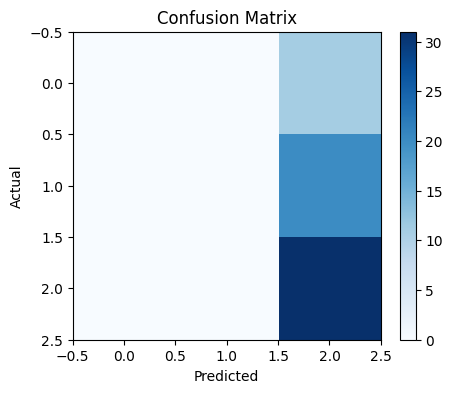

In [37]:
# Install MLflow if not available
!pip install mlflow

import mlflow
import mlflow.tensorflow

# Start an MLflow run
with mlflow.start_run():
    # Log model parameters
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 100)
    mlflow.log_param("optimizer", "adam")
    mlflow.log_param("loss_function", "sparse_categorical_crossentropy")
    mlflow.log_param("architecture", "Dense(6)-Dense(6)-Dense(6)-Dense(6)-Dense(3)")

    # Train the model
    history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=0)

    # Log metrics for last epoch
    mlflow.log_metric("train_accuracy", history.history["accuracy"][-1])
    mlflow.log_metric("val_accuracy", history.history["val_accuracy"][-1])
    mlflow.log_metric("train_loss", history.history["loss"][-1])
    mlflow.log_metric("val_loss", history.history["val_loss"][-1])

    # Log confusion matrix and classification report as artifacts
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix, classification_report
    import numpy as np

    y_pred = ann.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred_classes)

    # Plot and save confusion matrix
    plt.figure(figsize=(5,4))
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.colorbar()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Save classification report
    report = classification_report(y_test, y_pred_classes, target_names=le.classes_, output_dict=True)
    import json
    with open("classification_report.json", "w") as f:
        json.dump(report, f)
    mlflow.log_artifact("classification_report.json")

    # Log the trained model
    mlflow.tensorflow.log_model(ann, "model")



from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
print("Test Accuracy:", accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

# Model selection and hyperparameter tuning: Compare classical algorithms

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Remove rows with NaN or infinite values from X_train and y_train
is_finite = np.all(np.isfinite(X_train), axis=1)
X_train_clean = X_train[is_finite]
y_train_clean = y_train[is_finite]

# 1. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_clean, y_train_clean, cv=3, scoring='accuracy')
print(f"Random Forest CV accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")

# 2. Support Vector Machine
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
svc_scores = cross_val_score(svc_model, X_train_clean, y_train_clean, cv=3, scoring='accuracy')
print(f"SVM (RBF) CV accuracy: {svc_scores.mean():.4f} ± {svc_scores.std():.4f}")

# 3. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_scores = cross_val_score(lr_model, X_train_clean, y_train_clean, cv=3, scoring='accuracy')
print(f"Logistic Regression CV accuracy: {lr_scores.mean():.4f} ± {lr_scores.std():.4f}")

# Select best algorithm based on mean CV accuracy
cv_means = {
    "Random Forest": rf_scores.mean(),
    "SVM": svc_scores.mean(),
    "Logistic Regression": lr_scores.mean()
}
best_algo = max(cv_means, key=cv_means.get)
print(f"Best algorithm for your data: {best_algo}")

# Neural Network Model Selection and Comparison

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Helper function to build models with variable depth and width
def build_nn(input_dim, num_layers=1, units=16, dropout=0.0):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for _ in range(num_layers):
        model.add(layers.Dense(units, activation='relu'))
        if dropout > 0:
            model.add(layers.Dropout(dropout))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Split train set for validation
X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

results = []
architectures = [
    {"num_layers": 1, "units": 8, "dropout": 0.0},
    {"num_layers": 2, "units": 16, "dropout": 0.0},
    {"num_layers": 2, "units": 32, "dropout": 0.2},
    {"num_layers": 3, "units": 32, "dropout": 0.3},
    {"num_layers": 4, "units": 64, "dropout": 0.3}
]

for arch in architectures:
    print(f"\nTesting architecture: {arch}")
    model = build_nn(X_train.shape[1], num_layers=arch["num_layers"], units=arch["units"], dropout=arch["dropout"])
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train_sub, y_train_sub,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_sub, y_val_sub),
        callbacks=[early_stop],
        verbose=0
    )
    val_pred = model.predict(X_val_sub)
    val_pred_classes = val_pred.argmax(axis=1)
    acc = accuracy_score(y_val_sub, val_pred_classes)
    report = classification_report(y_val_sub, val_pred_classes, output_dict=True)
    results.append({
        "arch": arch,
        "accuracy": acc,
        "f1_macro": report["macro avg"]["f1-score"],
        "history": history.history
    })
    print(f"Validation accuracy: {acc:.4f}, Macro F1: {report['macro avg']['f1-score']:.4f}")

# Select best model by macro F1-score (handles class imbalance)
best_result = max(results, key=lambda x: x["f1_macro"])
print("\nBest architecture:", best_result["arch"])
print(f"Best validation accuracy: {best_result['accuracy']:.4f}, Macro F1: {best_result['f1_macro']:.4f}")

# Retrain best model on full training data and evaluate on test set
final_model = build_nn(X_train.shape[1], **best_result["arch"])
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
final_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)
y_pred = final_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
print("Test set accuracy:", accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_classes))

# Optionally, log best model and metrics with MLflow if desired

# Train and evaluate the best neural network architecture found: 1 hidden layer, 8 units, no dropout

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def build_best_nn(input_dim):
    model = models.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
best_model = build_best_nn(X_train.shape[1])
history = best_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

y_pred = best_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
print("Test set accuracy:", accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_classes))